**<p style="font-size: 35px; text-align: center">Analysis of Variance</p>**



***<center>Miguel Ángel Vélez Guerra</center>***

<hr/>

![anova](https://i.pinimg.com/originals/47/01/3b/47013becd153df62e9ee817a46e5a2ba.png)

<hr/>
<hr/>

**<p id="tocheading">Tabla de contenido</p>**
<br/>
<div id="toc"></div>


In [69]:
%%javascript
// Script to generate table of contents
$.getScript('../resources/table_of_contents.js')

<IPython.core.display.Javascript object>

<hr/>
<hr/>

## Imports

In [1]:
#-------Importing from other folder------#

import sys
sys.path.insert(0, "../resources/")

import mstats as ms

#-----------Miguel's statistics----------#

In [2]:
import scipy.stats as ss
import numpy as np

<hr/>
<hr/>

## 1. Análisis de varianza a una vía
El director administrativo de una empresa industrial desea determinar si los tres
programas de capacitación distintos tienen efectos diferentes en los niveles de
productividad de los empleados. Se seleccionan aleatoriamente 14 empleados y se
asignan a uno de los tres programas. Al terminar la capacitación, cada empleado
responde un examen para determinar su competencia. Se colocan cuatro empleados
en el primer programa de capacitación y cinco en cada uno de los otros dos
programas. Cada uno de estos tres grupos se trata de manera independiente como
nuestras separadas.

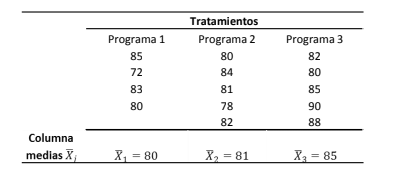

In [3]:
programa1 = [85, 72, 83, 80] # Resultados de la muestra 1
programa2 = [80, 84, 81, 78, 82] # Resultados de la muestra 2
programa3 = [82, 80, 85, 90, 88] # Resultados de la muestra 3

n_programas = 14 # Número total de observaciones
c_programas = 3 # Número total de tratamientos

alpha_programas = 0.05 # Nivel de significancia

**Ho:** μ1 = μ2 = μ3

**Ha:** μ1 ≠ μ2 ≠ μ3

**Encontramos las medias por cada tratamiento y la gran media**

In [4]:
mean_programa1 = np.mean(programa1)
mean_programa2 = np.mean(programa2)
mean_programa3 = np.mean(programa3)

bigmean_programas = np.mean(programa1 + programa2 + programa3)

### **Vamos a encontrar las sumas de los cuadrados**

**Suma de cuadrados total**

In [5]:
sct_programas = ms.anova.get_sct(programa1, programa2, programa3)
sct_programas

251.71428571428567

**Suma de cuadrados de los tratamientos**

In [6]:
sctr_programas = ms.anova.get_sctr(programa1, programa2, programa3)
sctr_programas

65.71428571428571

**Suma de cuadrados del error**

In [7]:
sce_programas = ms.anova.get_sce(programa1, programa2, programa3)
sce_programas

186.0

### Vamos a encontrar los cuadrados medios

**Cuadrado medio total**

In [8]:
cmt_programas = ms.anova.get_cmt(programa1, programa2, programa3)
cmt_programas

19.362637362637358

**Cuadrado medio del tratamiento**

In [9]:
cmtr_programas = ms.anova.get_cmtr(programa1, programa2, programa3)
cmtr_programas

32.857142857142854

**Cuadrado medio del error**

In [10]:
cme_programas = ms.anova.get_cme(programa1, programa2, programa3)
cme_programas

16.90909090909091

### Vamos a encontrar la razón F

In [11]:
f_programas = ms.anova.get_fratio(programa1, programa2, programa3)
f_programas

1.943164362519201

**Valor crítico**

In [12]:
df1_programas = c_programas - 1
df2_programas = n_programas - c_programas
ms.hypothesis.crit_val_f(df1_programas, df2_programas, alpha_programas)

3.9822979570944836

### Regla de decisión

Debido a que el valor de la razón f es **1.9431643625192017** que es menor al valor crítico encontrado **3.9822979570944836**, cae en la zona de no rechazo. Por lo que el CEO no debería rechazar la hipótesis de que el puntaje de prueba son los mismos en todos los tratamiento.

<hr/>
<hr/>

## 2. Análisis de varianza a una vía
Robert Shade es vicepresidente de mercadeo en First City Bank en
Atlanta. Los recientes esfuerzos promocionales para atraer nuevos depositantes incluyen
algunos juegos y premios en cuatro sucursales del banco. Shade está convencido de que
diferentes tipos de premios atraerían a diferentes grupos de ingreso. Las personas de un
nivel de ingreso prefieren los regalos, mientras que los de otro grupo de ingreso pueden
sentirse más atraídas por viajes gratuitos a sitios favoritos para pasar vacaciones. Shade
decide utilizar el monto de los depósitos como una media representativa del ingreso. El
desea determinar si existe una diferencia en el nivel promedio de depósitos entre las
cuatro sucursales. Si se halla alguna diferencia, Shade ofrecerá una diversidad de
premios promocionales. Se desea un alfa del 5%.

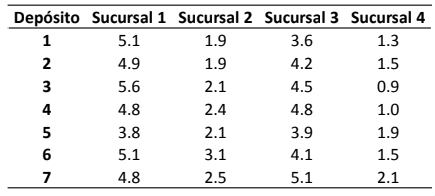

In [13]:
sucursal1 = [5.1, 4.9, 5.6, 4.8, 3.8, 5.1, 4.8] # Resultados de la muestra 1
sucursal2 = [1.9, 1.9, 2.1, 2.4, 2.1, 3.1, 2.5] # Resultados de la muestra 2
sucursal3 = [3.6, 4.2, 4.5, 4.8, 3.9, 4.1, 5.1] # Resultados de la muestra 3
sucursal4 = [1.3, 1.5, 0.9, 1.0, 1.9, 1.5, 2.1] # Resultados de la muestra 4

n_sucursales = 7*4 # Número total de observaciones
c_sucursales = 4 # Número total de tratamientos

alpha_sucursales = 0.05 # Nivel de significancia

In [14]:
ms.anova.get_fratio(sucursal1, sucursal2, sucursal3, sucursal4)

78.09022177419358

In [15]:
df1_sucursales = c_sucursales - 1
df2_sucursales = n_sucursales - c_sucursales
ms.hypothesis.crit_val_f(df1_sucursales, df2_sucursales, alpha_sucursales)

3.0087865704473615

No todas las medias son iguales, debido a que el valor de la razon F *78.09022177419358* es mayor al valor crítico *3.0087865704473615*

### Diferencia mínima significativa (DMS)

In [16]:
ms.anova.get_dms(sucursal1, sucursal2, sucursal3, sucursal4, sign=alpha_sucursales)

|x_1 - x_2| = |4.871428571428571 - 2.2857142857142856| = 2.5857142857142854 > 0.5361490207167764
|x_1 - x_3| = |4.871428571428571 - 4.314285714285715| = 0.557142857142856 > 0.5361490207167764
|x_1 - x_4| = |4.871428571428571 - 1.457142857142857| = 3.4142857142857137 > 0.5361490207167764
|x_2 - x_3| = |2.2857142857142856 - 4.314285714285715| = 2.0285714285714294 > 0.5361490207167764
|x_2 - x_4| = |2.2857142857142856 - 1.457142857142857| = 0.8285714285714285 > 0.5361490207167764
|x_3 - x_4| = |4.314285714285715 - 1.457142857142857| = 2.8571428571428577 > 0.5361490207167764


Podemos comprobar que según la prueba DMS, todas las poblaciones sugieren medias poblacionales diferentes, debido a que la diferencia entre las medias de cada uno son mayores al valor DMS correspondiente entre esas 2 medias.

<hr/>
<hr/>

## 3. Análisis de varianza a una vía
Cada vez más norteamericanos buscan escapar de las presiones urbanas, los pagos de
impuestos en los parques nacionales ha demostrado un incremento marcado de
quienes acampan los fines de semana. Outdoor World informó recientemente que el
parque Yosemite National Park ubicado en las sierras altas de California contrató un
consultor en economía para estudiar la situación financiera del parque.


Parte del esfuerzo realizado por el consultor requería una comparación de los ingresos
del parque provenientes de varias fuentes, incluyendo los pagos por acampar, licencias
para pescar y para pasear en bote. Aquí aparecen los datos para visitantes
seleccionados aleatoriamente. Se determina si existe diferencia en los ingresos
promedio que recibe el parque provenientes de estas tres actividades. Asuma un alfa de
5%.

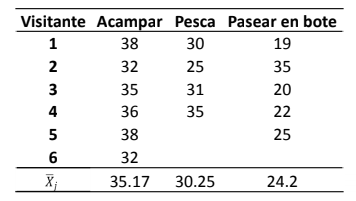

In [17]:
acampar = [38, 32, 35, 36, 38, 32] # Resultados de la muestra 1
pescar = [30, 25, 31, 35] # Resultados de la muestra 2
pasear_bote = [19, 35, 20, 22, 25] # Resultados de la muestra 3

n_parque = len(acampar + pescar + pasear_bote) # Número total de observaciones
c_parque = 3 # Número total de tratamientos

alpha_parque = 0.05 # Nivel de significancia

In [18]:
ms.anova.get_fratio(acampar, pescar, pasear_bote)

7.736749000851729

In [19]:
df1_parque = c_parque - 1
df2_parque = n_parque - c_parque
ms.hypothesis.crit_val_f(df1_parque, df2_parque, alpha_parque)

3.8852938346523933

No todas las medias son iguales debido a que el valor de la razón F *7.736749000851729* es mayor que el valor crítico *3.8852938346523933*

### Diferencia mínima significativa (DMS)

In [20]:
ms.anova.get_dms(acampar, pescar, pasear_bote, sign=alpha_parque)

|x_1 - x_2| = |35.166666666666664 - 30.25| = 4.916666666666664 <= 5.85814365695289
|x_1 - x_3| = |35.166666666666664 - 24.2| = 10.966666666666665 > 5.4954258663763
|x_2 - x_3| = |30.25 - 24.2| = 6.050000000000001 <= 6.0879614711278505


Segun la prueba DMS, solo acampar y pasear en bote tienen una diferencia mínima significativa.

Por lo que con un nivel de significancia del *5%* se puede concluir que solo acampar y pasear en bote tienen una diferencia mínima significativa.

<hr/>
<hr/>

## 4. Análisis de varianza a 2 vías
Una empresa de contabilidad grande trata de seleccionar un sistema de computación
integrado a la oficina, entre los tres modelos que están actualmente en estudio. La
selección final dependerá de la productividad de los sistemas. Se seleccionan
aleatoriamente cinco operadores para manejar cada sistema. Es importante tener en
cuenta que el nivel de experiencia que tienen los empleados en el manejo de
computadores puede afectar el resultado de la prueba. Por tanto, existe la necesidad de
justificar el impacto de la experiencia al determinar los méritos relativos de los sistemas
de computación. Los niveles resultantes de producción medios en unidades por hora
aparecen a continuación. El nivel de experiencia más alto indica más años de
capacitación.

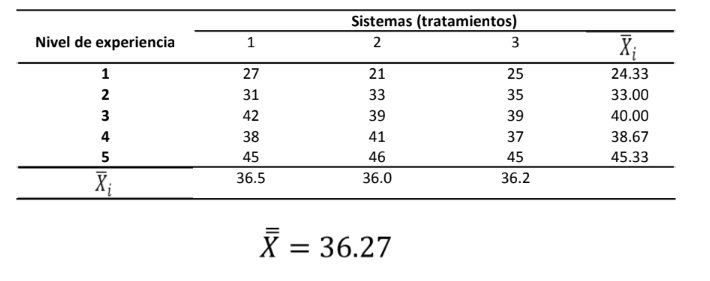

La empresa puede considerar que los años de experiencia de un operador afectan
significativamente su productividad. Sin embargo, la empresa está interesada en la
productividad de los sistemas de computación y no en la de los empleados. Por tanto se
debe ajustar la productividad de los empleados eliminando el efecto de la variabilidad del
operador para obtener una medida precisa, no contaminada, de la calidad del sistema.

In [21]:
sistema1 = [27, 31, 42, 38, 45] # Resultados tratamiento 1
sistema2 = [21, 33, 39, 41, 46]
sistema3 = [25, 35, 39, 37, 45]

In [22]:
scbl_sistemas = ms.anova.get_scbl(sistema1, sistema2, sistema3)
scbl_sistemas

764.9333333333334

In [23]:
sct_sistemas = ms.anova.get_sct(sistema1, sistema2, sistema3)
sct_sistemas

806.9333333333333

In [24]:
sctr_sistemas = ms.anova.get_sctr(sistema1, sistema2, sistema3)
sctr_sistemas

0.9333333333333362

In [25]:
sce_sistemas = ms.anova.get_sce2(sistema1, sistema2, sistema3)
sce_sistemas

41.066666666666606

In [26]:
cmt_sistemas = ms.anova.get_cmt(sistema1, sistema2, sistema3)
cmt_sistemas

57.63809523809523

In [27]:
cmtr_sistemas = ms.anova.get_cmtr(sistema1, sistema2, sistema3)
cmtr_sistemas

0.4666666666666681

In [28]:
cme_sistemas = ms.anova.get_cme2(sistema1, sistema2, sistema3)
cme_sistemas

5.133333333333326

In [29]:
cmbl_sistemas = ms.anova.get_cmbl(sistema1, sistema2, sistema3)
cmbl_sistemas

191.23333333333335

In [30]:
fratio_sistemas = ms.anova.get_fratio2(sistema1, sistema2, sistema3)
fratio_sistemas

0.09090909090909133

In [31]:
fratio_cmbl_sistemas = ms.anova.get_fratio2_cmbl(sistema1, sistema2, sistema3)
fratio_cmbl_sistemas

37.25324675324681

In [37]:
df1_sistemas = len(sistema1) - 1
df2_sistemas = (len(sistema1) - 1)*(3 - 1)
ms.hypothesis.crit_val_f(df1_sistemas, df2_sistemas, 0.05)

3.837853354555897

Como el f de los bloques es mayor al valor crítico se concluye que los niveles de experiencia tienen un efecto en las tasas de producción.

Ahora la empresa está preparada para probar la hipótesis en la cual estuvo originalmente
interesada. ¿Existe alguna diferencia en la producción promedio de los sistemas de
computación (tratamientos)?
Si el valor de alfa del 5% se mantiene, el valor crítico de F para CMTR con 2 y 8 grados de
libertad se obtiene de la tabla y es Fα,(c-1),(r-1)(c-1) = F0.05,2,8 = 4.46 (2 en el numerador por
CMTR y 8 en el denominador por CME).
La hipótesis a probar es:

H0
: μ1 = μ2 = μ3

HA: no todas las medias de las columnas son iguales

Donde
μi
son las medias de las columnas para los tres sistemas de computación.
Regla de decisión: “No rechazar la hipótesis nula si F ≤ 4.46. Rechazar la hipótesis nula si F
> 4.46”.
F = 0.09 < 4.46 por lo que la hipótesis nula no se rechaza y la empresa concluye que los
niveles de producción promedio de los tres sistemas de computación no difieren, una vez
que se ha hecho la corrección para el factor experiencia. Los empleados de diferentes
niveles de experiencia se desempeñan igualmente bien en todas las máquinas. No
interesa cual sistema de computación compren.

<hr/>
<hr/>

## 5. Análisis de varianza a 2 vías
Una emisión reciente de la revista Fortune describió los esfuerzos
realizados por una importante empresa electrónica para desarrollar un sistema en el
cual se les daba a los empleados la oportunidad de evaluar el desempeño de sus
supervisores. Se seleccionan aleatoriamente cinco empleados y se les pide evaluar a
cuatro de sus gerentes en una escala del 10 al 50. Los resultados son:

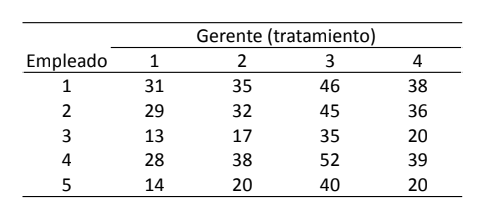

El gerente de la empresa de electrónica desea saber si existe diferencia entre las
clasificaciones promedio de los cuatro gerentes.

In [40]:
puntajes1 = [31, 29, 13, 28, 14] # Resultados tratamiento 1
puntajes2 = [35, 32, 17, 38, 20] # Resultados tratamiento 2
puntajes3 = [46, 45, 35, 52, 40] # Resultados tratamiento 3
puntajes4 = [38, 36, 20, 39, 20] # Resultados tratamiento 4

r_puntajes = 5 # Número de bloques
c_puntajes = 4 # Número de tratamientos
n_puntajes = r_puntajes * c_puntajes # Número total de observaciones

alpha_puntajes = 0.05 # Nivel de significancia

In [41]:
df1_sistemas = r_puntajes - 1
df2_sistemas = (r_puntajes - 1) * (c_puntajes - 1)
ms.hypothesis.crit_val_f(df1_sistemas, df2_sistemas, alpha_puntajes)

3.259166726901249

**Vamos a verficar si el puntaje promedio por cada empleado